### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
data.dropna(inplace=True)

### DATA PREPROCESSING

In [ ]:
columns = ['work_type', 'Residence_type', 'smoking_status', 'stroke']

# Print value counts for each column
for col in columns:
    print(f"Value counts for '{col}':")
    print(data[col].value_counts())
    print("\n")  # Add space between outputs

# Print unique values for each column
for col in columns:
    print(f"Unique values in '{col}': {data[col].unique()}")
    print("\n")  # Add space between outputs

Value counts for 'work_type':
work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64


Value counts for 'Residence_type':
Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64


Value counts for 'smoking_status':
smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64


Value counts for 'stroke':
stroke
0    4700
1     209
Name: count, dtype: int64


Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Unique values in 'Residence_type': ['Urban' 'Rural']


Unique values in 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Unique values in 'stroke': [1 0]




In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Columns to encode
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the selected columns
encoded_array = encoder.fit_transform(data[columns_to_encode])

# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_encode))

# Add the encoded columns to the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Drop the original columns
data = data.drop(columns=columns_to_encode)



In [ ]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.6,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,80.0,0.0,1.0,105.92,32.5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,49.0,0.0,0.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1.0,0.0,174.12,24.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5,81.0,0.0,0.0,186.21,29.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = data.drop('stroke',axis=1)
y = data['stroke']

y = y.replace(['?', 'None', '', ' '], np.nan)

X = X[~y.isna()]
y = y.dropna()

### MODEL BUILDING AND PERFORMANCE METRICS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# train the model
rf_model.fit(X_train, y_train)

# predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:

from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy: %.2f\n\n' % acc)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm, '\n\n')
print('----------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report: \n',)
print(result)

accuracy: 0.95


[[936   4]
 [ 42   0]] 


----------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       940
         1.0       0.00      0.00      0.00        42

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.95      0.93       982



Text(50.722222222222214, 0.5, 'Actual')

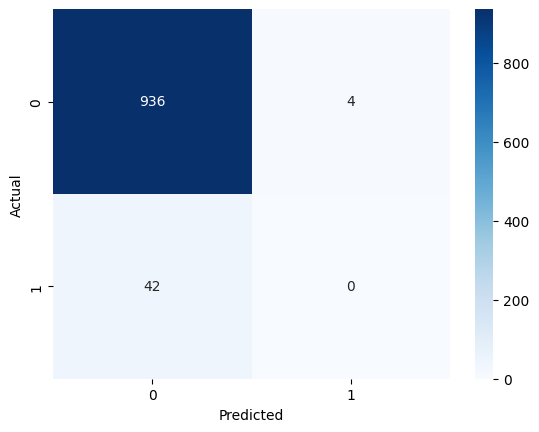

In [ ]:
# visuaising the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')